# Problem to solve

## Column information
1. accelerationTime: time for car to accelarate
2. bodyTye: kind of body type
3. brand
4. cargoVolume:
5. driveWheelConfiguaration:
6. eLabel:
7. emissonsCO2:
8. engineCapacity:
9. fuelCapacity:
10. fuelCapacity:
11. fuelComsumption:
12. fuelType:
13. height:
14. length:
15. model:
16. modelDate:
17. name:
18. numberOfAxles:
19. numberOfDoors:
20. numberOfForwardGears:
21. payload:
22. price:
23. roofLoad:
24. seatingCapacity:
25. speed:
26. torque:
27. trailerWeight:
28. url:
29. vEengineDisplacement
30. vEenginePower
31. vEengineType
32. vEfuelType
33. vehicleTransmission
34. weight
35. weightTotal
36. wheelbase
37. width

## Project goal
Predict the price of a cars based on these above features

# Import And See The Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
clean_data_path = '/home/genkibaskervillge/Documents/Cars-price-prediction-Data-Science/Data Cleaning/cars_data_cleaning.csv'
data = pd.read_csv(clean_data_path, encoding='latin-1')
data.head

<bound method NDFrame.head of          25       bodyType   brand  cargoVolume  curbWeight  \
0       6.8      hatchback    Audi       1020.0      1375.0   
1       7.8  station wagon    Audi       1680.0      1745.0   
2       9.2  station wagon   Honda       1668.0      1188.0   
3       9.5  station wagon    Audi       1680.0      1685.0   
4       7.0  station wagon    Audi       1680.0      1680.0   
...     ...            ...     ...          ...         ...   
75990   9.5          sedan  Subaru        486.0      1395.0   
75991  11.1          sedan  Subaru        486.0      1435.0   
75992  10.3          sedan  Subaru        486.0      1452.0   
75993   9.5          sedan  Subaru        486.0      1395.0   
75994  11.1          sedan  Subaru        486.0      1435.0   

      driveWheelConfiguration eLabel  emissionsCO2  engineCapacity  \
0                  front+rear      g         218.0          1781.0   
1                  front+rear      c         115.0          1968.0   
2  

This dataset is cleaned from the raw crawler data, contains 75,995 rows and 37 cloumns. This section will deal with EDA problem of this dataset, see the characteristics of each cloumn features and the relationships between each of them and the most important is the affect of each to the column 'price'.

### Overview about data

In [3]:
# Information of each features of dataset
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75995 entries, 0 to 75994
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   accelerationTime         73763 non-null  float64
 1   bodyType                 75995 non-null  object 
 2   brand                    75995 non-null  object 
 3   cargoVolume              74946 non-null  float64
 4   curbWeight               75769 non-null  float64
 5   driveWheelConfiguration  75995 non-null  object 
 6   eLabel                   61841 non-null  object 
 7   emissionsCO2             61705 non-null  float64
 8   engineCapacity           75818 non-null  float64
 9   fuelCapacity             75815 non-null  float64
 10  fuelConsumption          74862 non-null  float64
 11  fuelType                 75858 non-null  object 
 12  height                   75925 non-null  float64
 13  length                   75974 non-null  float64
 14  model                 

Most of data is the numerical number (type float64 and int64). Only some columns consists of Object type (11 cloumns). So, first we verify some columns of this type then overivew describe about others numerical features

In [5]:
# Verify some cloumns of Object types; we take example 3 columns
cols_to_verify = ['driveWheelConfiguration', 'eLabel', 'vEengineType']
for col in cols_to_verify:
    print(col.upper() + ' Columns')
    print(data[col].value_counts())
    print()

DRIVEWHEELCONFIGURATION Columns
front         53600
rear          11827
front+rear    10568
Name: driveWheelConfiguration, dtype: int64

ELABEL Columns
g    35038
e     6103
d     6064
f     6022
c     5221
b     2490
a      903
Name: eLabel, dtype: int64

VEENGINETYPE Columns
fuel engine       75170
hybrid              526
plugin hybrid       165
electric motor      134
Name: vEengineType, dtype: int64



In [7]:
# Then see the distribution of numerical attributes
data.describe()

,accelerationTime,cargoVolume,curbWeight,emissionsCO2,engineCapacity,fuelCapacity,fuelConsumption,height,length,modelDate,...,seatingCapacity,speed,torque,trailerWeight,vEengineDisplacement,vEenginePower,weight,weightTotal,wheelbase,width
count,73763.000000,74946.000000,75769.000000,61705.000000,75818.000000,75815.000000,74862.000000,75925.000000,75974.000000,75995.000000,...,74026.000000,75215.000000,75888.000000,0.0,75818.000000,75946.000000,0.0,74983.000000,75969.000000,75970.000000
mean,10.652689,1173.072786,1354.292336,163.504043,1967.117624,59.360206,7.004242,1495.500744,4436.188209,2004.557063,...,4.946005,198.450043,251.100820,NaN,1967.117624,108.589919,NaN,1933.073283,2661.834446,1771.517586
std,2.957012,726.498829,301.391706,49.706530,705.041881,11.835721,4.236233,138.842303,385.509466,9.329384,...,0.675835,28.919672,118.412814,NaN,705.041881,54.403769,NaN,372.423984,186.624874,85.135467
min,2.500000,31.000000,474.000000,12.000000,599.000000,9.000000,0.600000,1012.000000,339.000000,1969.000000,...,2.000000,80.000000,38.000000,NaN,599.000000,12.000000,NaN,690.000000,216.000000,1300.000000
25%,8.700000,570.000000,1150.000000,127.000000,1581.000000,51.000000,5.400000,1421.000000,4222.000000,1999.000000,...,5.000000,179.000000,160.000000,NaN,1581.000000,75.000000,NaN,1685.000000,2546.000000,1710.000000
50%,10.500000,1165.000000,1342.000000,155.000000,1948.000000,60.000000,6.700000,1458.000000,4483.000000,2007.000000,...,5.000000,195.000000,235.000000,NaN,1948.000000,99.000000,NaN,1920.000000,2659.000000,1777.000000
75%,12.300000,1510.000000,1515.000000,190.000000,1999.000000,66.000000,8.200000,1512.000000,4702.000000,2012.000000,...,5.000000,216.000000,320.000000,NaN,1999.000000,128.000000,NaN,2130.000000,2760.000000,1826.000000
max,35.000000,11500.000000,2921.000000,595.000000,8277.000000,208.000000,999.900000,2815.000000,6967.000000,2019.000000,...,9.000000,415.000000,1500.000000,NaN,8277.000000,882.000000,NaN,3901.000000,4325.000000,2240.000000


Most of our cloumns have a large number of data with various mean and standard variation

In [8]:
# See Not unique data
data.nunique()

accelerationTime             227
bodyType                      10
brand                         89
cargoVolume                 1043
curbWeight                  1599
driveWheelConfiguration        3
eLabel                         7
emissionsCO2                 381
engineCapacity               768
fuelCapacity                  97
fuelConsumption              194
fuelType                       9
height                       645
length                      1229
model                       1605
modelDate                     51
name                       60546
numberOfAxles                  1
numberOfDoors                  4
numberOfForwardGears           8
payload                      822
price                      26125
roofLoad                      38
seatingCapacity                8
speed                        225
torque                       472
trailerWeight                  0
url                        75995
vEengineDisplacement         768
vEenginePower                369
vEengineTy

In [9]:
# See if there is any null in our data
null_info = pd.DataFrame({'Null count': data.isnull().sum(), 'Null ratio': data.isnull().sum()/len(data)})
# null_info.drop('price', inplace=True)
null_info.sort_values(by='Null ratio', ascending=False, inplace=True)
null_info

,Null count,Null ratio
trailerWeight,75995,1.000000
weight,75995,1.000000
emissionsCO2,14290,0.188039
eLabel,14154,0.186249
roofLoad,11222,0.147668
accelerationTime,2232,0.029370
numberOfForwardGears,1969,0.025910
seatingCapacity,1969,0.025910
fuelConsumption,1133,0.014909
cargoVolume,1049,0.013804


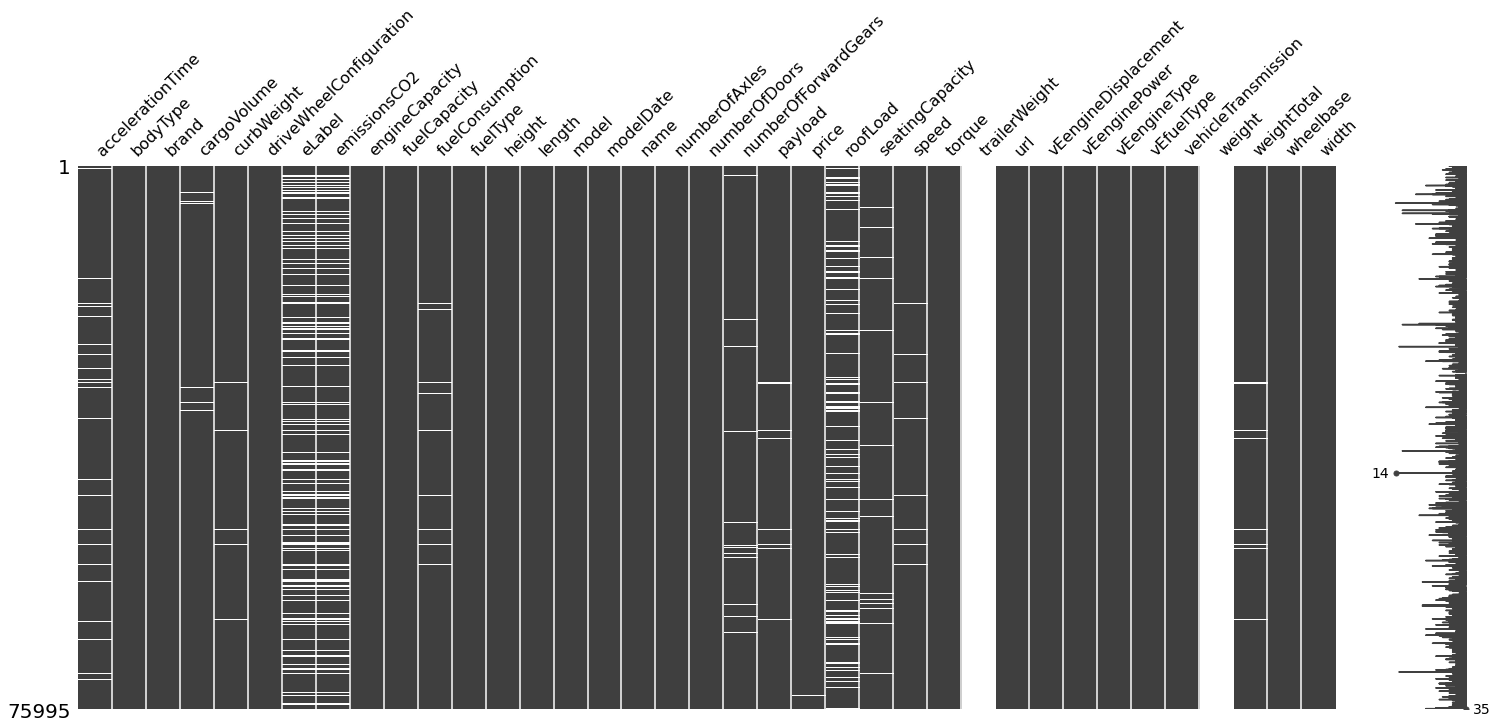

In [11]:
# visualize missing data
import missingno as msno

msno.matrix(data);

As you can see in this figure, this dataset contains a lot of missing value. Most of null/nan value is set on some columns like eLabel, emissionsCO2, roofLoad. Moreover, the trainlerWeight and weight column is totally empty, then we do not need to concentrate in these two. A smaller number of missing value is divided into few column that still need to careful preprocess to have the best result for modeling phase.

## Visualize And Data Processing

In [12]:
data

,accelerationTime,bodyType,brand,cargoVolume,curbWeight,driveWheelConfiguration,eLabel,emissionsCO2,engineCapacity,fuelCapacity,...,url,vEengineDisplacement,vEenginePower,vEengineType,vEfuelType,vehicleTransmission,weight,weightTotal,wheelbase,width
0,6.8,hatchback,Audi,1020.0,1375.0,front+rear,g,218.0,1781.0,55.0,...,http://www.cars-data.com/en/audi-s3-quattro-sp...,1781.0,154.0,fuel engine,Gasoline,Manual transmission,NaN,1935.0,2519.0,1763.0
1,7.8,station wagon,Audi,1680.0,1745.0,front+rear,c,115.0,1968.0,73.0,...,http://www.cars-data.com/en/audi-a6-avant-40-t...,1968.0,150.0,fuel engine,Diesel,Automatic with double clutch,NaN,2425.0,2924.0,1886.0
2,9.2,station wagon,Honda,1668.0,1188.0,front,e,146.0,1798.0,50.0,...,http://www.cars-data.com/en/honda-civic-tourer...,1798.0,104.0,fuel engine,Gasoline,Manual transmission,NaN,1790.0,2595.0,1770.0
3,9.5,station wagon,Audi,1680.0,1685.0,front,b,109.0,1968.0,73.0,...,http://www.cars-data.com/en/audi-a6-avant-35-t...,1968.0,120.0,fuel engine,Diesel,Automatic with double clutch,NaN,2330.0,2924.0,1886.0
4,7.0,station wagon,Audi,1680.0,1680.0,front,c,144.0,1984.0,73.0,...,http://www.cars-data.com/en/audi-a6-avant-45-t...,1984.0,180.0,fuel engine,Gasoline,Automatic with double clutch,NaN,2310.0,2924.0,1886.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75990,9.5,sedan,Subaru,486.0,1395.0,front+rear,g,198.0,1994.0,64.0,...,http://www.cars-data.com/en/subaru-legacy-2.0i...,1994.0,110.0,fuel engine,Gasoline,Manual transmission,NaN,2000.0,2750.0,1780.0
75991,11.1,sedan,Subaru,486.0,1435.0,front+rear,g,185.0,1994.0,64.0,...,http://www.cars-data.com/en/subaru-legacy-2.0i...,1994.0,110.0,fuel engine,Gasoline,traploze automatic,NaN,2020.0,2750.0,1780.0
75992,10.3,sedan,Subaru,486.0,1452.0,front+rear,g,190.0,2457.0,64.0,...,http://www.cars-data.com/en/subaru-legacy-2.5i...,2457.0,123.0,fuel engine,Gasoline,traploze automatic,NaN,2020.0,2750.0,1780.0
75993,9.5,sedan,Subaru,486.0,1395.0,front+rear,g,198.0,1994.0,64.0,...,http://www.cars-data.com/en/subaru-legacy-2.0i...,1994.0,110.0,fuel engine,Gasoline,Manual transmission,NaN,2000.0,2750.0,1780.0


Because most of our features are string, we need to turn them into numerics. In this part, I'll go through each column, visualize and process them at the same time. It's quite hard to build a pipeline for processing this dataset from end to end. So I'll opt for the simple way.

Since we should not touch the test set until our model is ready to run, I'll explore and visualize only the training set. But data preprocessing (clean, encode, ...) is done on both.

In [3]:
# set params for matplotlib
import matplotlib
matplotlib.rcParams['figure.figsize'] = (9,6)
# create a copy of the original training set
data1 = data.copy()

### 1. accelerationTime

<AxesSubplot:xlabel='accelerationTime', ylabel='Count'>

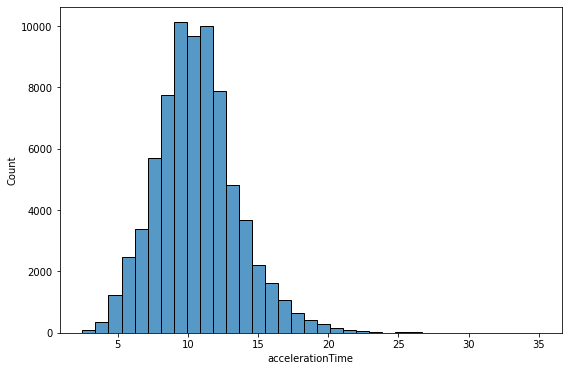

In [17]:
data1.accelerationTime
sns.histplot(data1.accelerationTime, bins=35)

In [18]:
#skewness and kurtosis
print("Skewness: %f" % data1['accelerationTime'].skew())
print("Kurtosis: %f" % data1['accelerationTime'].kurt())

Skewness: 0.626438
Kurtosis: 1.472326


/home/genkibaskervillge/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


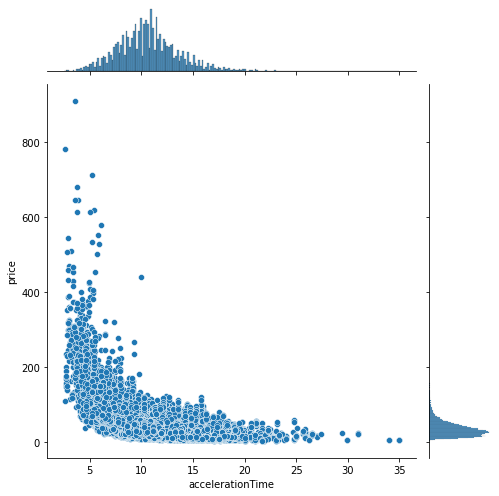

In [23]:
sns.jointplot(x="accelerationTime", y="price", data=data1, size=7)
plt.show()

Most of cars have their accelerationTime in the range of 5 to 15 secs with slily positive skew, then the relationship between this features with 'price' is inverse function.

### 2. bodyType

In [27]:
data1['bodyType'].value_counts(dropna=False)

hatchback        24091
sedan            15894
station wagon    14122
suv/crossover     7553
mpv               6311
coupé             3469
convertible       3131
bus               1233
pick-up            115
van                 76
Name: bodyType, dtype: int64

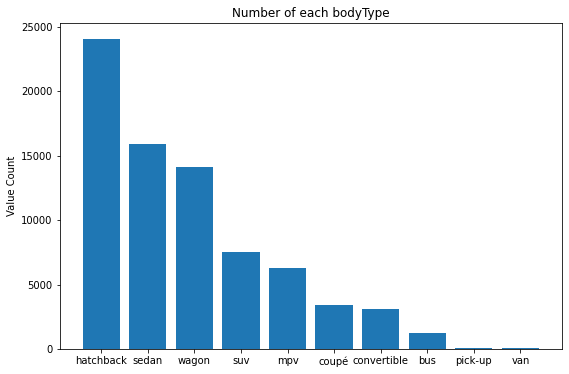

In [38]:
height = [24091, 15894, 14122, 7553, 6311, 3469, 3131, 1233, 115, 76]
bars = ('hatchback', 'sedan', 'wagon', 'suv', 'mpv', 'coupé', 'convertible', 'bus', 'pick-up', 'van')
y_pos = np.arange(len(bars))
# Create bars
plt.bar(y_pos, height)
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.ylabel("Value Count")
plt.title("Number of each bodyType")
plt.show()

In [32]:
# bodyType
# no null value
bodyType_list = data1['bodyType'].unique().tolist()
bodyType_list.sort()

for idx, value in enumerate(bodyType_list):
    data1['bodyType'] = data1['bodyType'].replace(value, idx)

data1['bodyType']

0        3
1        7
2        7
3        7
4        7
        ..
75990    6
75991    6
75992    6
75993    6
75994    6
Name: bodyType, Length: 75995, dtype: int64

/home/genkibaskervillge/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


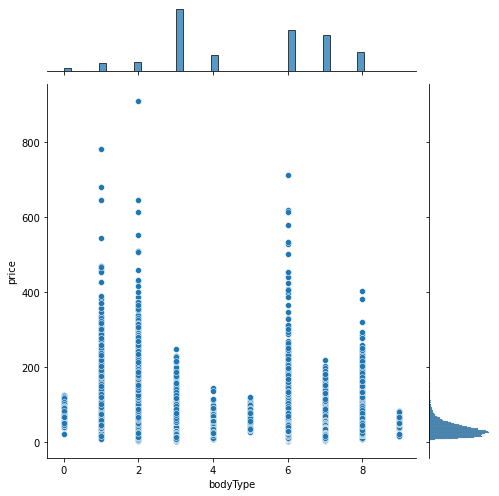

In [44]:
sns.jointplot(x="bodyType", y="price", data=data1, size=7)
plt.show()

Most of cars type is hatchback and the less is van

### 3. brand

In [39]:
data1['brand'].value_counts(dropna=False)

Audi             6515
Opel             6346
BMW              5452
Volvo            5376
Mercedes-Benz    5354
                 ... 
Buick               2
Think               1
Josse               1
Carver              1
Princess            1
Name: brand, Length: 89, dtype: int64

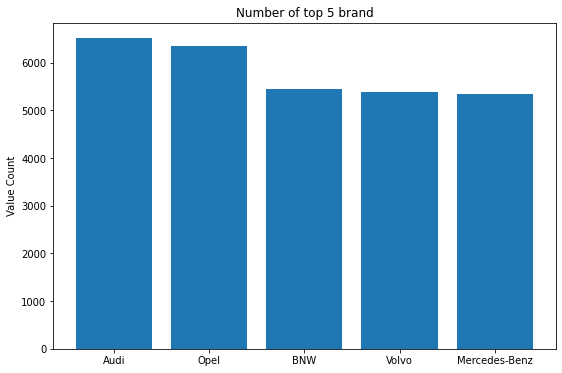

In [40]:
# top 5 brand with the most cars
height = [6515, 6346, 5452, 5376, 5354]
bars = ('Audi', 'Opel', 'BNW', 'Volvo', 'Mercedes-Benz')
y_pos = np.arange(len(bars))
# Create bars
plt.bar(y_pos, height)
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.ylabel("Value Count")
plt.title("Number of top 5 brand")
plt.show()

In [41]:
# brand
# no null value
brand_list = data1['brand'].unique().tolist()
brand_list.sort()
print(f'Number of unique brand :{len(brand_list)}')

for idx, value in enumerate(brand_list):
    data1['brand'] = data1['brand'].replace(value, idx)

data1['brand']

Number of unique brand :89


0         4
1         4
2        30
3         4
4         4
         ..
75990    78
75991    78
75992    78
75993    78
75994    78
Name: brand, Length: 75995, dtype: int64

/home/genkibaskervillge/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


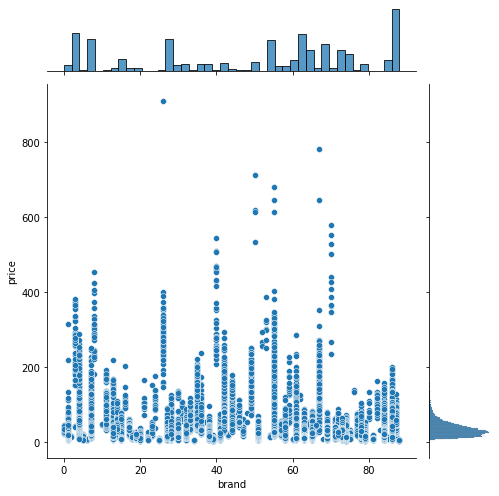

In [43]:
sns.jointplot(x="brand", y="price", data=data1, size=7)
plt.show()

As we can see in these above figure, the distribution is various which you can see that there're a lot of car brand but most of the number in in the typical basic brand such as Audi, Opel, BWN, Volvo or Mercedes-Benz,... So this kind of brand will have more affect to our model result than other (even based on major voting of number of car in each brand)

### 4. cargoVolume

In [4]:
data1['cargoVolume'].value_counts(dropna=False)

1100.0    1179
1600.0    1125
1200.0    1098
520.0     1085
NaN       1049
          ... 
1519.0       1
428.0        1
319.0        1
1911.0       1
107.0        1
Name: cargoVolume, Length: 1044, dtype: int64

Text(0.5, 1.0, 'Boxplot for find outliers')

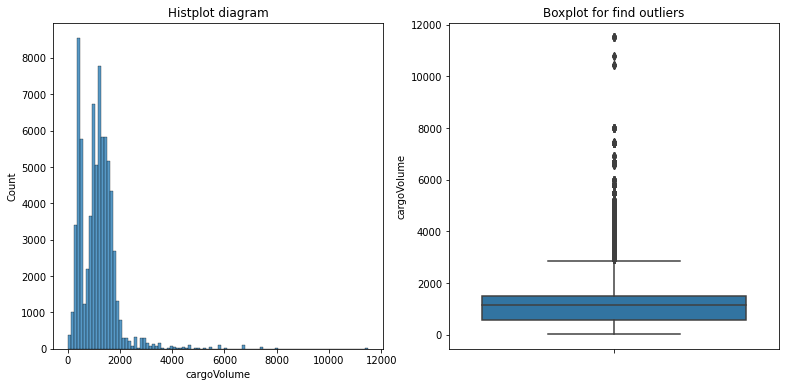

In [4]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(data1.cargoVolume, bins=100)
plt.title('Histplot diagram')
plt.subplot(1,2,2)
sns.boxplot(y="cargoVolume", data=data1)
plt.title('Boxplot for find outliers')

In [9]:
#skewness and kurtosis
print("Skewness: %f" % data1['cargoVolume'].skew())
print("Kurtosis: %f" % data1['cargoVolume'].kurt())

Skewness: 3.181038
Kurtosis: 23.821187


/home/genkibaskervillge/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


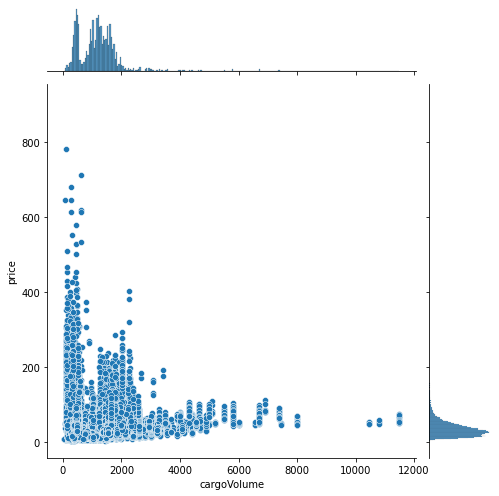

In [10]:
sns.jointplot(x="cargoVolume", y="price", data=data1, size=7)
plt.show()

We find out that cargoVolumn distributed in binormal form, this shows that the larger range of this distribution has more affect to price than another. The distribution of this columns is highly effected by large number of outliers as boxplot diagram shows. Hence, dealing with outlier and normalize this column also need to be carful in processing process.

### 5. curbWeight

In [34]:
data1['curbWeight'].value_counts(dropna=False)

1405.0    1029
1295.0    1022
1180.0     741
1515.0     583
1285.0     519
          ... 
2357.0       1
2359.0       1
1751.0       1
2340.0       1
2049.0       1
Name: curbWeight, Length: 1600, dtype: int64

/home/genkibaskervillge/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Relationship between curWeight and price')

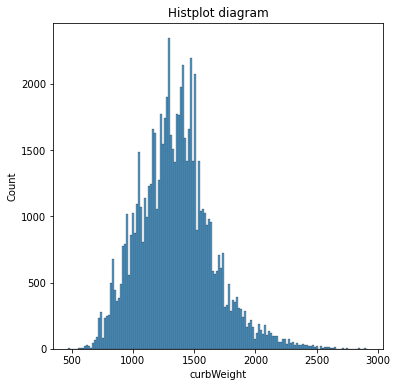

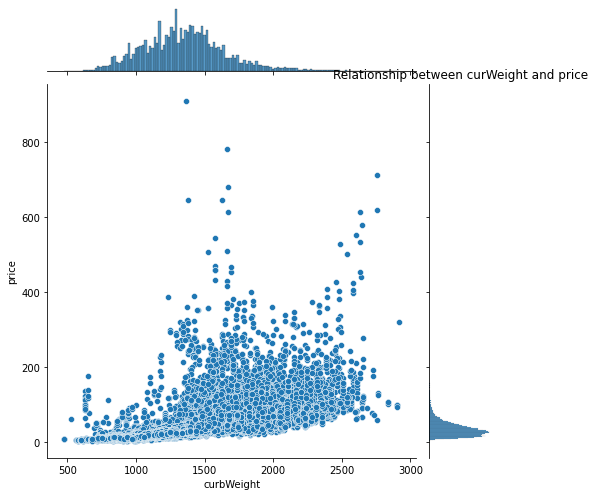

In [33]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(data1.curbWeight, bins=150)
plt.title('Histplot diagram')
plt.subplot(1,2,1)
sns.jointplot(x="curbWeight", y="price", data=data1, size=7)
plt.title('Relationship between curWeight and price')

In [31]:
#skewness and kurtosis
print("Skewness: %f" % data1['curbWeight'].skew())
print("Kurtosis: %f" % data1['curbWeight'].kurt())

Skewness: 0.547858
Kurtosis: 0.825227


This curbWeight features distributes nearly like Gaussian distribution whith slidely shift to left side (positive skewness), and the value range (variance) is quite large. This distribution is unlike the separated once above features, it has direct relation with target features "Price" but not quite clearly enough. This feature still need to be processed before put into model.

### 6. driveWheelConfiguration

In [36]:
data1['driveWheelConfiguration'].value_counts(dropna=False)

front         53600
rear          11827
front+rear    10568
Name: driveWheelConfiguration, dtype: int64

Text(0.5, 1.0, 'Pie chart for WheelConfiguration')

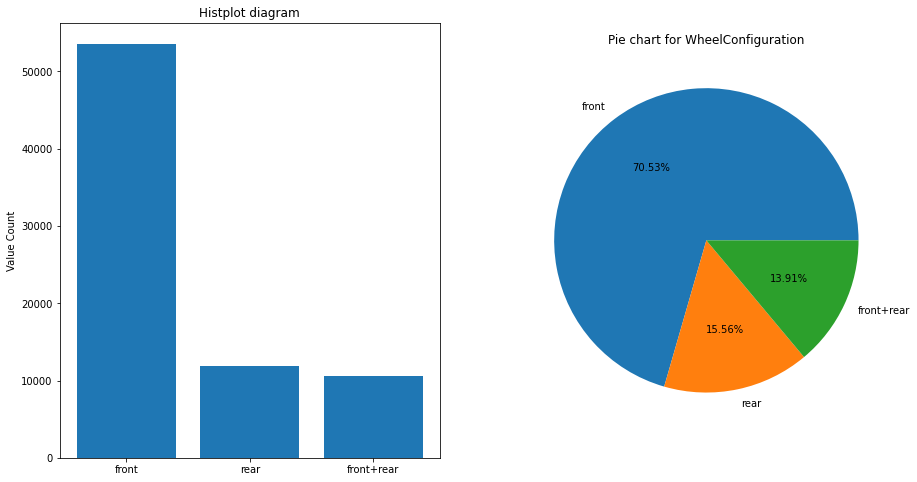

In [58]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
height = [53600, 11827, 10568]
bars = ('front', 'rear', 'front+rear')
y_pos = np.arange(len(bars))
# Create bars
plt.bar(y_pos, height)
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.ylabel("Value Count")
plt.title("Number of top each WheelConfiguration")
plt.title('Histplot diagram')
fig = plt.subplot(1,2,2)
# ax = fig.add_axes([0,0,1,1])
# ax.axis('equal')
kinds = ['front', 'rear', 'front+rear']
counts = [53600, 11827, 10568]
fig.pie(counts, labels = kinds,autopct='%1.2f%%')
plt.title('Pie chart for WheelConfiguration')

As the above figure, the font type is the dominan kind that it takes most of 70% number of driveWheelConfiguration. Two others class takes a small number compared with 'front' while still has the same percentage. This means the 'font' type could has more affect than other.

In [59]:
# bodyType
# no null value
driveWheelConfiguration_list = data1['driveWheelConfiguration'].unique().tolist()
driveWheelConfiguration_list.sort()

for idx, value in enumerate(driveWheelConfiguration_list):
    data1['driveWheelConfiguration'] = data1['driveWheelConfiguration'].replace(value, idx)

data1['driveWheelConfiguration']

0        1
1        1
2        0
3        0
4        0
        ..
75990    1
75991    1
75992    1
75993    1
75994    1
Name: driveWheelConfiguration, Length: 75995, dtype: int64

/home/genkibaskervillge/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


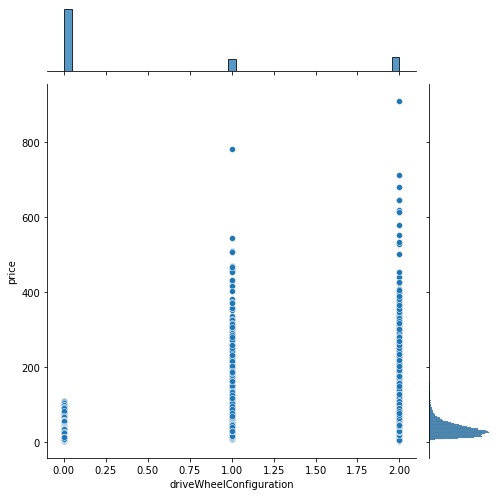

In [60]:
sns.jointplot(x="driveWheelConfiguration", y="price", data=data1, size=7)
plt.show()

Most of cars have front type of WheelConfiguration, the distribution seeems separated, we can clearly see the relation of only the main type 'front' with the target feature 'Price'.

## 7. eLabel

In [4]:
data1['eLabel'].value_counts(dropna=False)

g      35038
NaN    14154
e       6103
d       6064
f       6022
c       5221
b       2490
a        903
Name: eLabel, dtype: int64

/home/genkibaskervillge/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Relationship between eLabel and price')

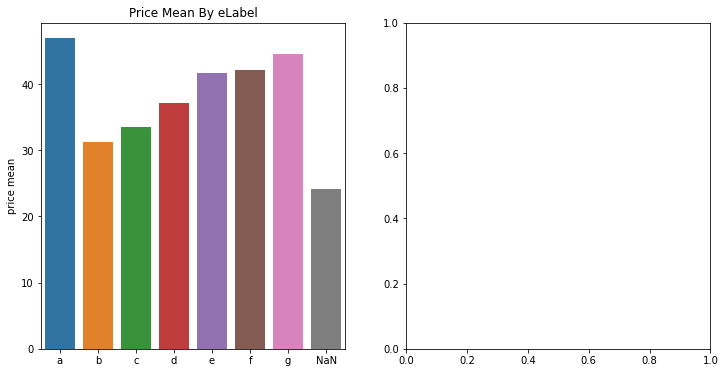

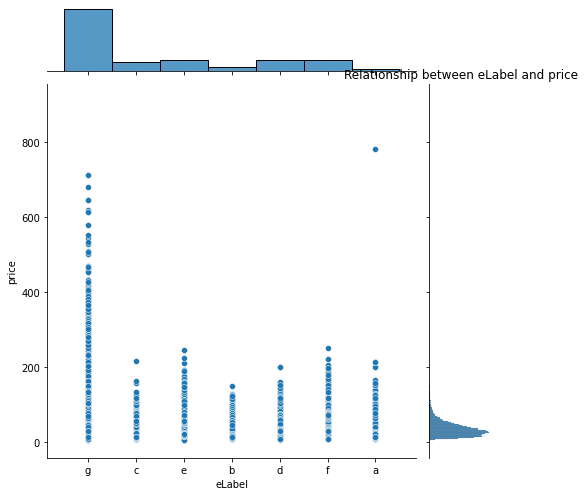

In [13]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
mean_price_per_eLabel = data1.groupby('eLabel', dropna=False)['price'].mean()
mean_price_per_eLabel.index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'NaN']
sns.barplot(x=mean_price_per_eLabel.index, y=mean_price_per_eLabel)
plt.ylabel('price mean')
plt.title('Price Mean By eLabel')
fig = plt.subplot(1,2,2)
sns.jointplot(x="eLabel", y="price", data=data1, size=7)
plt.title('Relationship between eLabel and price')

## 8. emissionsCO2

In [14]:
data1['emissionsCO2'].value_counts(dropna=False)

NaN      14290
119.0     1334
139.0     1238
159.0     1215
149.0     1201
         ...  
423.0        1
595.0        1
425.0        1
390.0        1
454.0        1
Name: emissionsCO2, Length: 382, dtype: int64

<AxesSubplot:ylabel='emissionsCO2'>

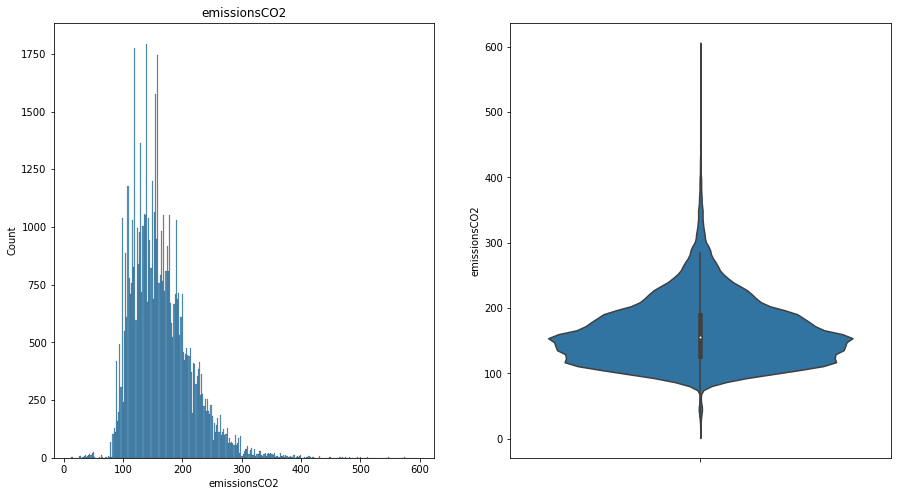

In [30]:
plt.figure(figsize=(15, 8))
plt.subplot(1,2,1)
sns.histplot(data1.emissionsCO2, bins=300)
plt.title('emissionsCO2')
fig = plt.subplot(1,2,2)
sns.violinplot(y="emissionsCO2", data=data1, size=8)

/home/genkibaskervillge/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Relationship between emissionsCO2 and price')

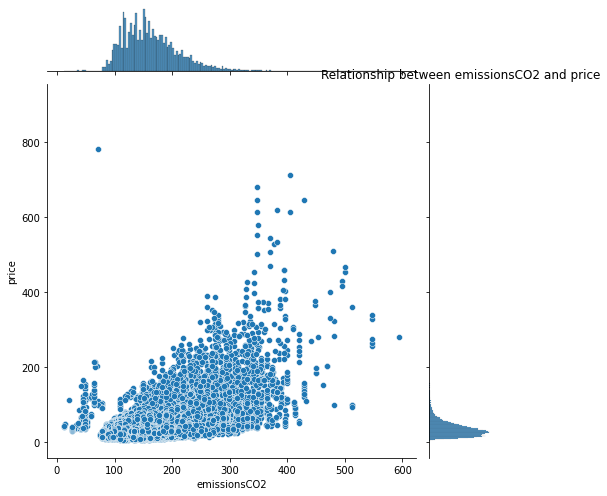

In [19]:
sns.jointplot(x="emissionsCO2", y="price", data=data1, size=7)
plt.title('Relationship between emissionsCO2 and price')

The distribution of emissionCO2 is highly positive skewness, that means most value concentrated in left side, the range of value is small (variance) while the relationship with 'Price' that high price has high emissionCO2

## 9. engineCapacity

In [22]:
data1['engineCapacity'].value_counts(dropna=False)

1598.0    5659
1998.0    3618
1968.0    2981
1995.0    2526
1997.0    2437
          ... 
3431.0       1
3471.0       1
3746.0       1
4698.0       1
3535.0       1
Name: engineCapacity, Length: 769, dtype: int64

<AxesSubplot:ylabel='engineCapacity'>

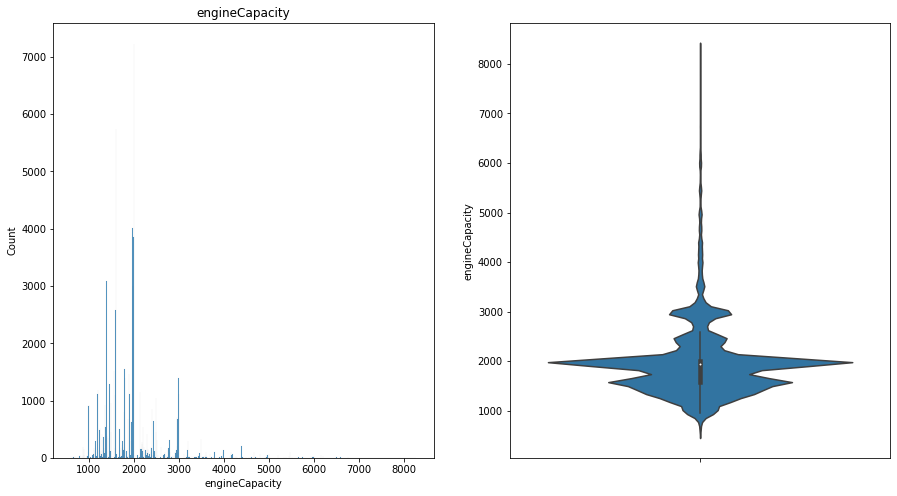

In [24]:
plt.figure(figsize=(15, 8))
plt.subplot(1,2,1)
sns.histplot(data1.engineCapacity, bins=1000)
plt.title('engineCapacity')
fig = plt.subplot(1,2,2)
sns.violinplot(y="engineCapacity", data=data1, size=8)

/home/genkibaskervillge/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Relationship between engineCapacity and price')

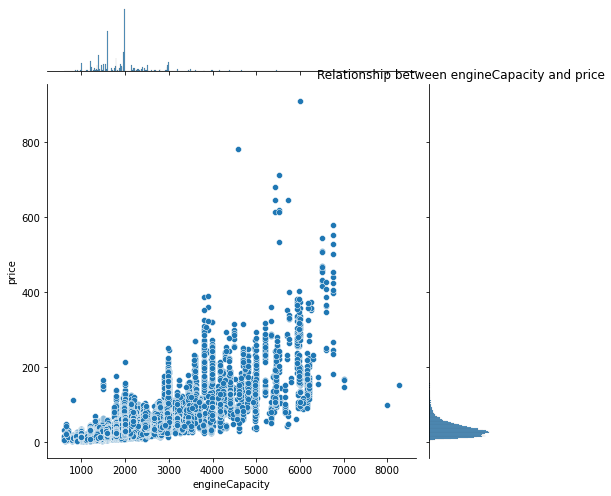

In [25]:
sns.jointplot(x="engineCapacity", y="price", data=data1, size=7)
plt.title('Relationship between engineCapacity and price')

## 10. fuelCapacity

In [26]:
data1['fuelCapacity'].value_counts(dropna=False)

60.0     9669
70.0     7825
55.0     7113
50.0     6414
45.0     4384
         ... 
103.0       1
208.0       1
107.0       1
113.0       1
120.0       1
Name: fuelCapacity, Length: 98, dtype: int64

<AxesSubplot:ylabel='fuelCapacity'>

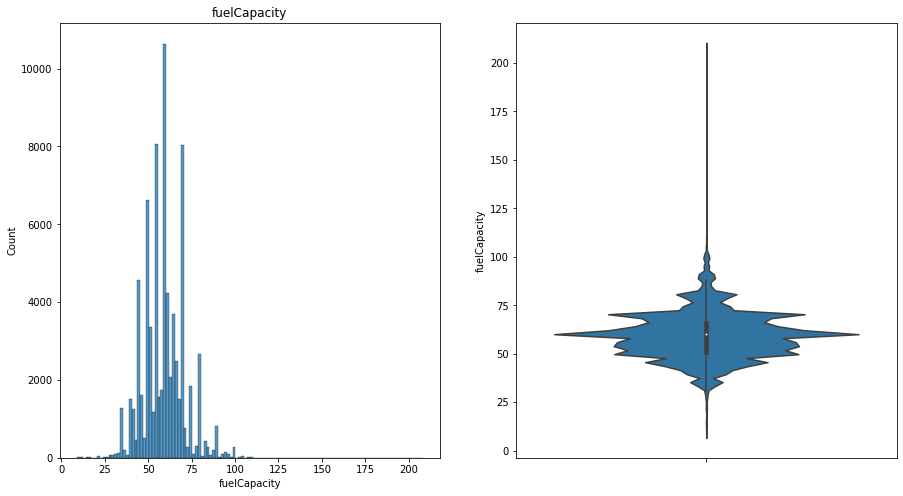

In [28]:
plt.figure(figsize=(15, 8))
plt.subplot(1,2,1)
sns.histplot(data1.fuelCapacity, bins=120)
plt.title('fuelCapacity')
fig = plt.subplot(1,2,2)
sns.violinplot(y="fuelCapacity", data=data1, size=8)

/home/genkibaskervillge/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Relationship between fuelCapacity and price')

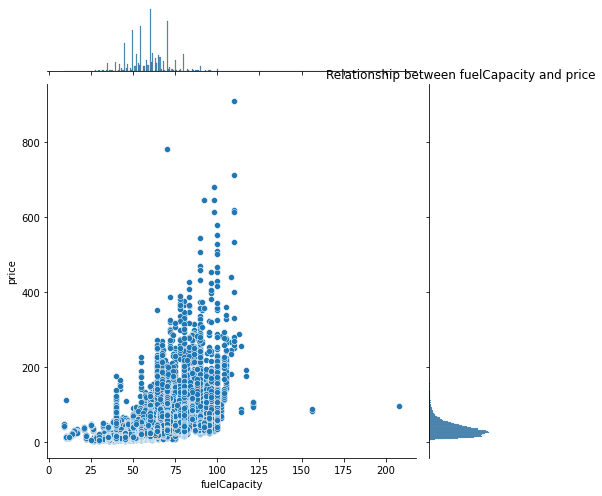

In [29]:
sns.jointplot(x="fuelCapacity", y="price", data=data1, size=7)
plt.title('Relationship between fuelCapacity and price')

## 11. fuelConsumption

In [31]:
data1['fuelConsumption'].value_counts(dropna=False)

5.9     1994
5.8     1691
6.0     1689
6.4     1645
5.7     1637
        ... 
18.0       1
19.6       1
19.1       1
19.2       1
18.5       1
Name: fuelConsumption, Length: 195, dtype: int64

<AxesSubplot:ylabel='fuelConsumption'>

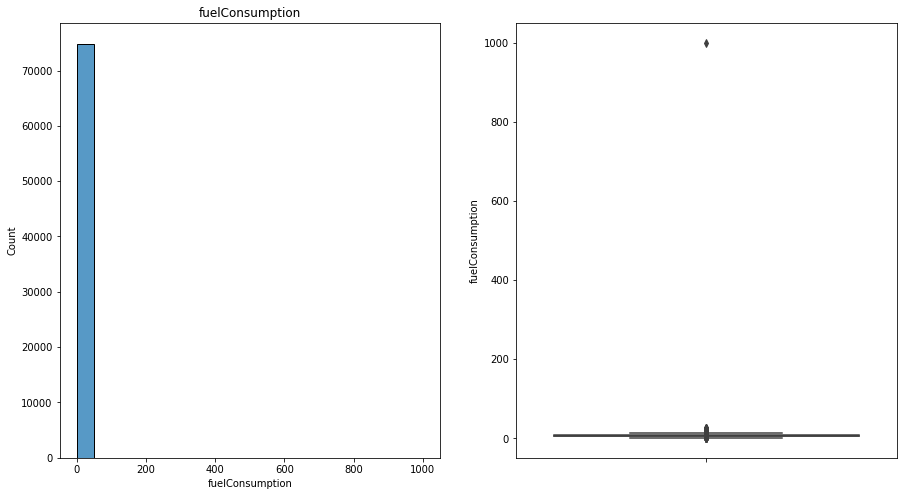

In [33]:
plt.figure(figsize=(15, 8))
plt.subplot(1,2,1)
sns.histplot(data1.fuelConsumption, bins=20)
plt.title('fuelConsumption')
fig = plt.subplot(1,2,2)
sns.boxplot(y="fuelConsumption", data=data1)

/home/genkibaskervillge/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Relationship between fuelConsumption and price')

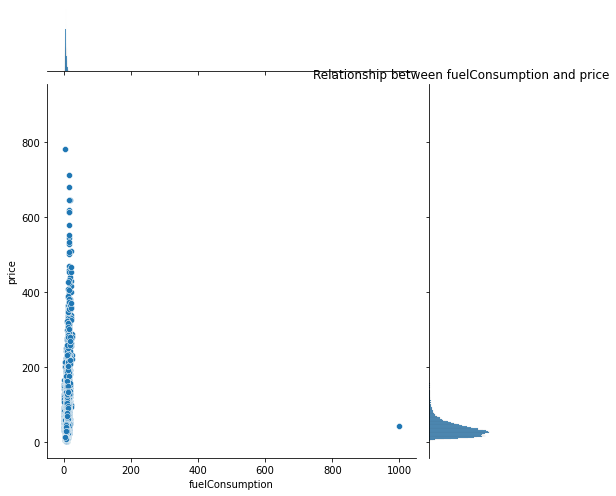

In [34]:
sns.jointplot(x="fuelConsumption", y="price", data=data1, size=7)
plt.title('Relationship between fuelConsumption and price')

## 12. fuelType

In [35]:
data1['fuelType'].value_counts(dropna=False)

Gasoline                  46738
Diesel                    28039
Bio ethanol                 390
Natural gas / gasoline      204
LPG / gasoline              192
NaN                         137
Natural gas                 130
LPG                          93
Bio ethanol / gasoline       60
Gasoline / bio ethanol       12
Name: fuelType, dtype: int64

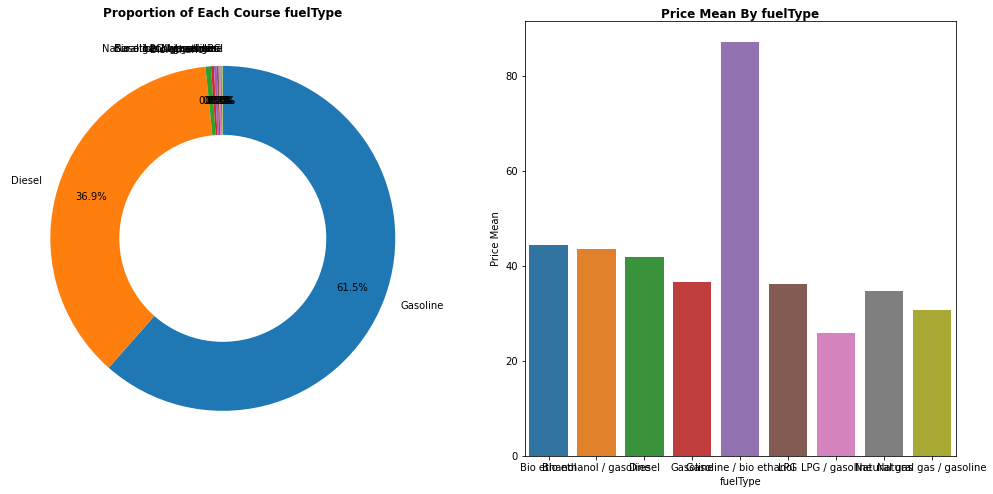

In [36]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(17,8))
# plot the proportion of each course type
fuelType_count = data1.fuelType.value_counts(dropna=False)
ax1.pie(fuelType_count,labels=fuelType_count.index,startangle=90,counterclock=False,
        wedgeprops={'width':0.4}, autopct = "%1.1f%%", pctdistance=0.80);
ax1.set_title('Proportion of Each Course fuelType', fontsize=12, fontweight='bold')
# relationship of course type with the target value
mean_price_by_fuelType = data1.groupby('fuelType', dropna=False).agg({'price':np.mean})
sns.barplot(x=mean_price_by_fuelType.index, y=mean_price_by_fuelType.price, ax=ax2)
ax2.set_ylabel('Price Mean')
ax2.set_title('Price Mean By fuelType', fontsize=12, fontweight='bold', pad=0.8);

/home/genkibaskervillge/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Relationship between fuelType and price')

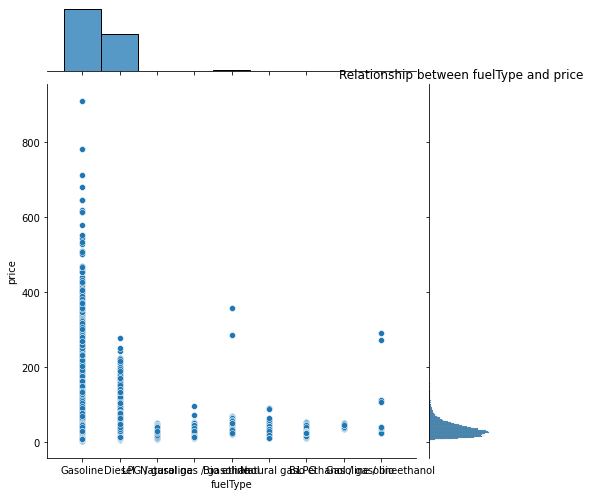

In [37]:
sns.jointplot(x="fuelType", y="price", data=data1, size=7)
plt.title('Relationship between fuelType and price')

## 13. height

In [38]:
data1['height'].value_counts(dropna=False)

1421.0    1613
1460.0    1348
1425.0    1323
1457.0    1290
1470.0    1047
          ... 
1287.0       1
2495.0       1
1185.0       1
2303.0       1
1768.0       1
Name: height, Length: 646, dtype: int64

<AxesSubplot:ylabel='height'>

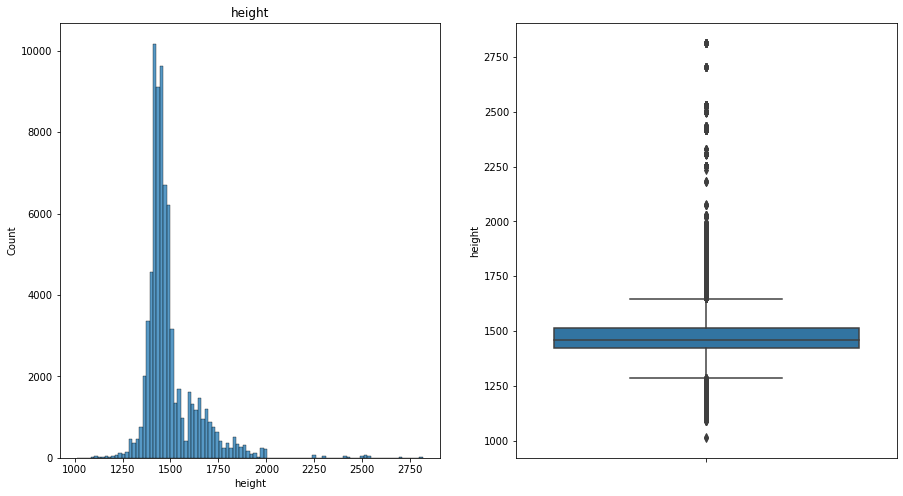

In [47]:
plt.figure(figsize=(15, 8))
plt.subplot(1,2,1)
sns.histplot(data1.height, bins=100)
plt.title('height')
fig = plt.subplot(1,2,2)
sns.boxplot(y="height", data=data1)

/home/genkibaskervillge/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Relationship between height and price')

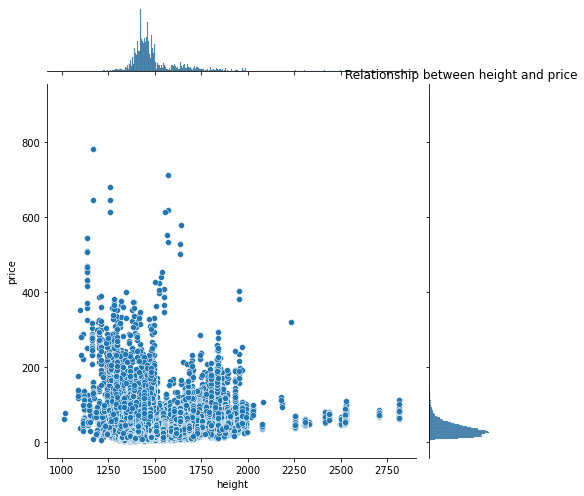

In [41]:
sns.jointplot(x="height", y="price", data=data1, size=7)
plt.title('Relationship between height and price')

## 14. length

In [42]:
data1['length'].value_counts(dropna=False)

4628.0    740
4720.0    671
4520.0    496
4703.0    480
4239.0    434
         ... 
5350.0      1
3888.0      1
3524.0      1
3932.0      1
4019.0      1
Name: length, Length: 1230, dtype: int64

<AxesSubplot:ylabel='length'>

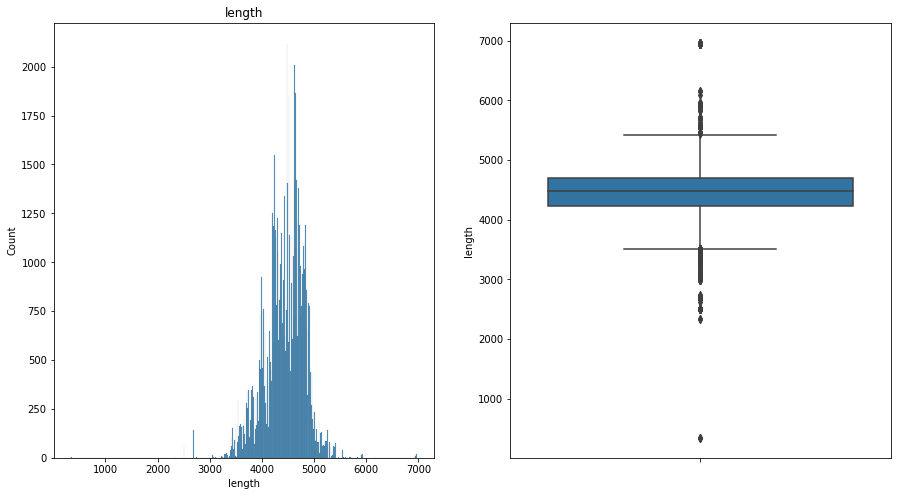

In [46]:
plt.figure(figsize=(15, 8))
plt.subplot(1,2,1)
sns.histplot(data1.length, bins=500)
plt.title('length')
fig = plt.subplot(1,2,2)
sns.boxplot(y="length", data=data1)

/home/genkibaskervillge/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Relationship between length and price')

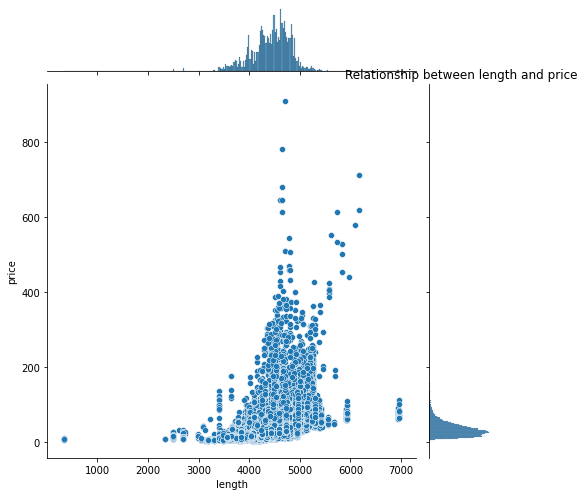

In [44]:
sns.jointplot(x="length", y="price", data=data1, size=7)
plt.title('Relationship between length and price')

## 15. model

In [48]:
data1['model'].value_counts(dropna=False)

Volkswagen Golf      1279
Opel Astra            947
BMW 3-series          863
Audi A3               853
Audi A3 Sportback     764
                     ... 
Daimler 3.6             1
Mclaren 675LT           1
Subaru E-Wagon          1
Cadillac Eldorado       1
BMW i8 Roadster         1
Name: model, Length: 1605, dtype: int64

Text(0.5, 0, 'Price Mean')

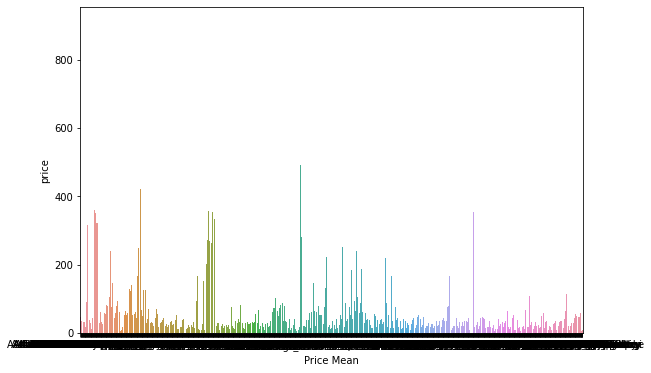

In [69]:
mean_price_by_model = data1.groupby('model', dropna=False).agg({'price': np.mean})
# edit the index to plot the null part
edited_index = list(mean_price_by_model.index)
# edited_index[6] = 'NaN'
mean_price_by_model.index = edited_index
# plot
sns.barplot(y=mean_price_by_model.price, x=mean_price_by_model.index)
plt.xlabel('Price Mean')

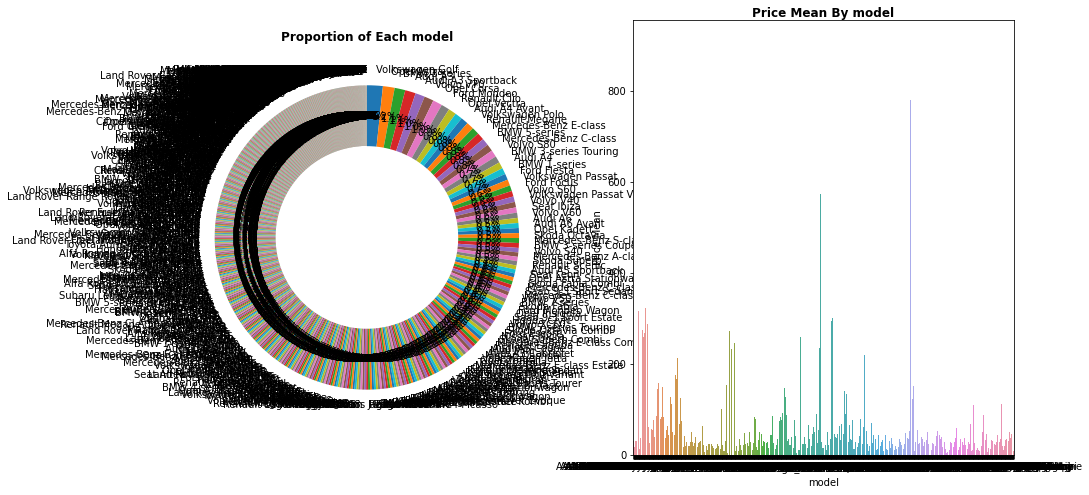

In [52]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,8))
# plot the proportion of each course type
model_count = data1.model.value_counts(dropna=False)
ax1.pie(model_count,labels=model_count.index,startangle=90,counterclock=False,
        wedgeprops={'width':0.4}, autopct = "%1.1f%%", pctdistance=0.80);
ax1.set_title('Proportion of Each model', fontsize=12, fontweight='bold')
# relationship of course type with the target value
mean_price_by_model = data1.groupby('model', dropna=False).agg({'price':np.mean})
sns.barplot(x=mean_price_by_model.index, y=mean_price_by_model.price, ax=ax2)
ax2.set_ylabel('Price Mean')
ax2.set_title('Price Mean By model', fontsize=12, fontweight='bold', pad=0.8);

/home/genkibaskervillge/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Relationship between model and price')

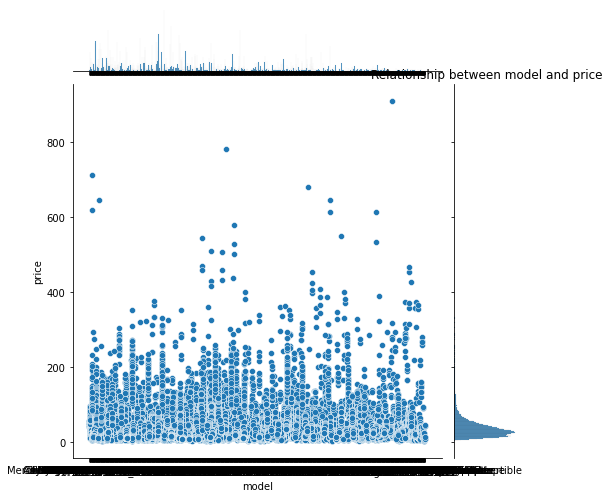

In [51]:
sns.jointplot(x="model", y="price", data=data1, size=7)
plt.title('Relationship between model and price')

## 16. modelDate

In [53]:
data1['modelDate'].value_counts(dropna=False)

2013    5015
2008    4285
2010    3996
2011    3736
2007    3567
2012    3463
2005    3385
2004    3174
2014    2981
2015    2876
2009    2841
2003    2841
2002    2285
2006    2258
2001    2202
2017    2091
1999    2061
2016    2045
1998    1983
2000    1911
1997    1535
1996    1457
1994    1415
1995    1184
2018    1015
1986     902
1985     867
1993     867
1991     792
1989     791
1992     756
1984     722
1988     651
1983     593
2019     516
1982     461
1987     458
1990     439
1981     414
1979     348
1980     294
1977     148
1978     140
1975      87
1976      82
1974      30
1972      15
1971       8
1973       7
1970       3
1969       2
Name: modelDate, dtype: int64

<AxesSubplot:ylabel='modelDate'>

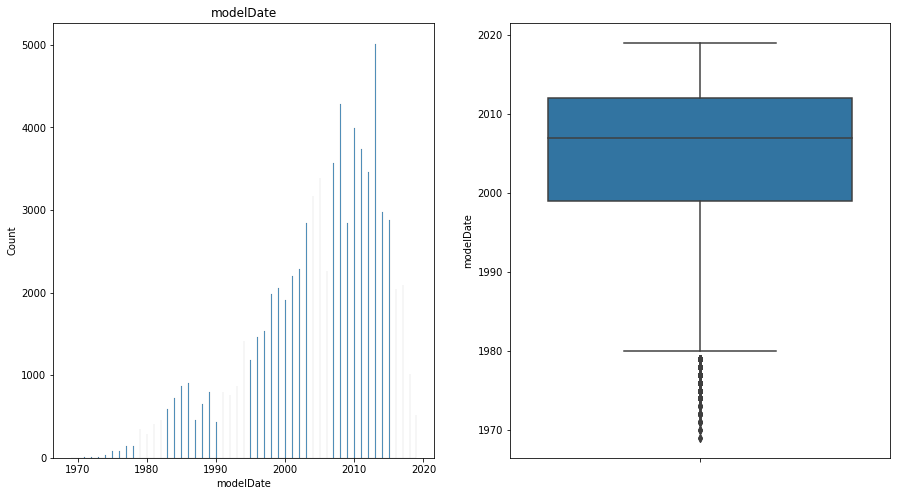

In [55]:
plt.figure(figsize=(15, 8))
plt.subplot(1,2,1)
sns.histplot(data1.modelDate, bins=500)
plt.title('modelDate')
fig = plt.subplot(1,2,2)
sns.boxplot(y="modelDate", data=data1)

/home/genkibaskervillge/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Relationship between modelDate and price')

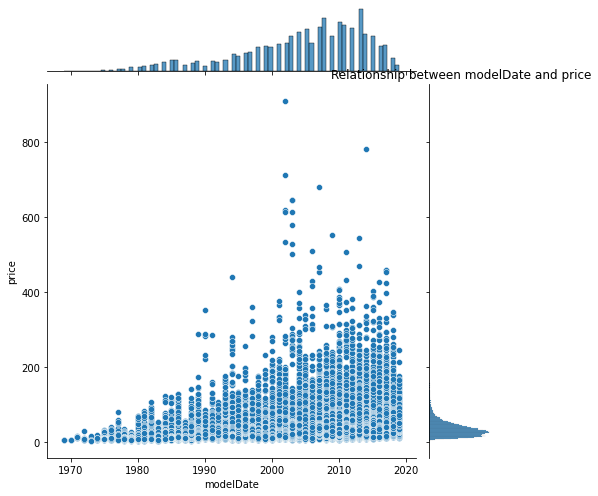

In [54]:
sns.jointplot(x="modelDate", y="price", data=data1, size=7)
plt.title('Relationship between modelDate and price')

## 17. numberOfAxles

In [56]:
data1['numberOfAxles'].value_counts(dropna=False)

2    75995
Name: numberOfAxles, dtype: int64

<AxesSubplot:ylabel='numberOfAxles'>

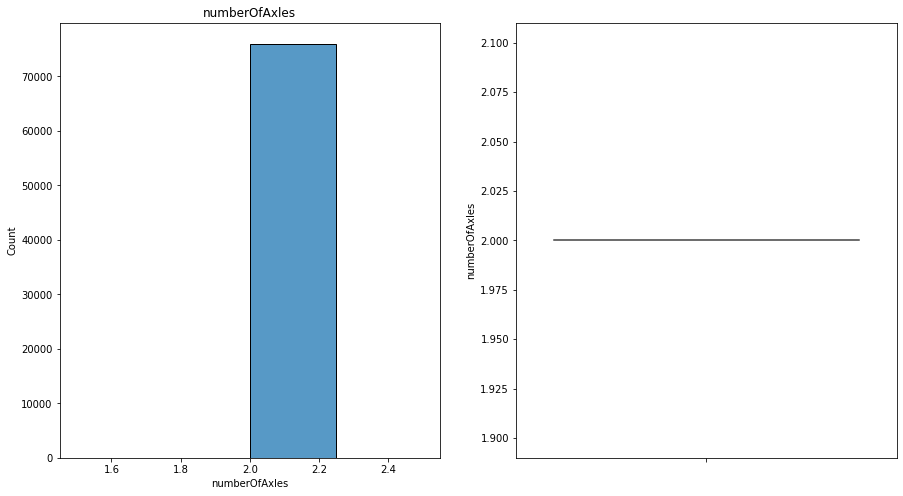

In [59]:
plt.figure(figsize=(15, 8))
plt.subplot(1,2,1)
sns.histplot(data1.numberOfAxles, bins=4)
plt.title('numberOfAxles')
fig = plt.subplot(1,2,2)
sns.violinplot(y="numberOfAxles", data=data1, size=8)

/home/genkibaskervillge/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Relationship between numberOfAxles and price')

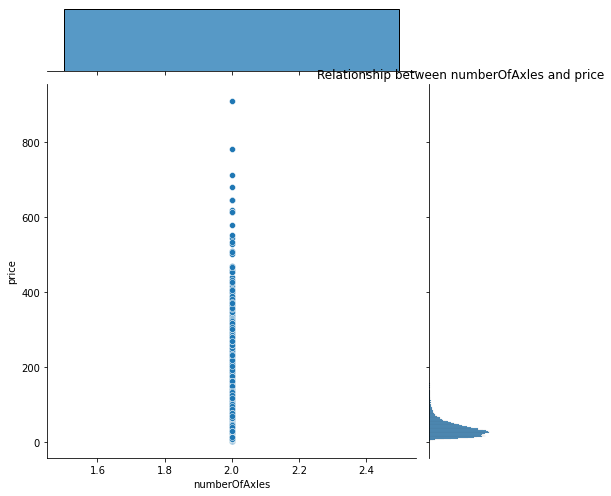

In [58]:
sns.jointplot(x="numberOfAxles", y="price", data=data1, size=7)
plt.title('Relationship between numberOfAxles and price')

## 18. numberOfDoors

In [60]:
data1['numberOfDoors'].value_counts(dropna=False)

5    43029
4    17123
3    10068
2     5775
Name: numberOfDoors, dtype: int64

Text(0.5, 1.0, 'Pie chart for numberOfDoors')

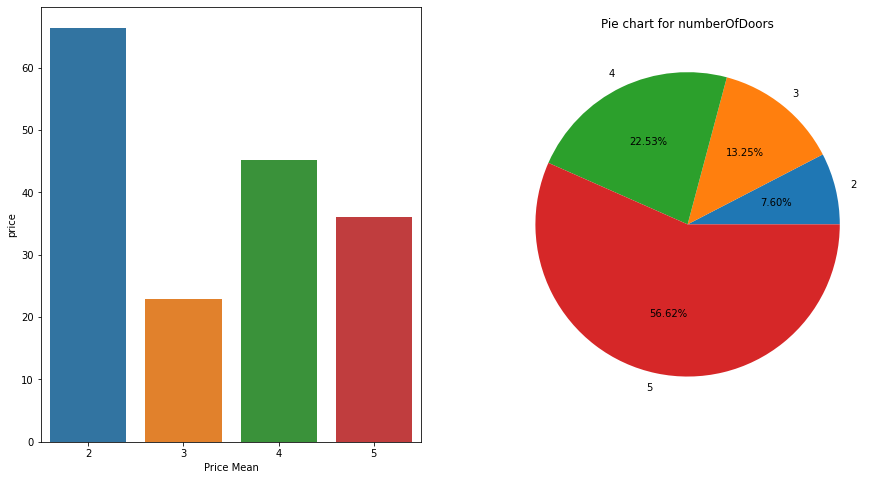

In [68]:
plt.figure(figsize=(15, 8))
plt.subplot(1,2,1)
mean_price_by_numberOfDoors = data1.groupby('numberOfDoors', dropna=False).agg({'price': np.mean})
# edit the index to plot the null part
edited_index = list(mean_price_by_numberOfDoors.index)
# edited_index[6] = 'NaN'
mean_price_by_numberOfDoors.index = edited_index
# plot
sns.barplot(y=mean_price_by_numberOfDoors.price, x=mean_price_by_numberOfDoors.index)
plt.xlabel('Price Mean')
fig = plt.subplot(1,2,2)
# ax = fig.add_axes([0,0,1,1])
# ax.axis('equal')
kinds = ['2', '3', '4', '5']
counts = [5775, 10068, 17123, 43029]
fig.pie(counts, labels = kinds,autopct='%1.2f%%')
plt.title('Pie chart for numberOfDoors')

/home/genkibaskervillge/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Relationship between numberOfDoors and price')

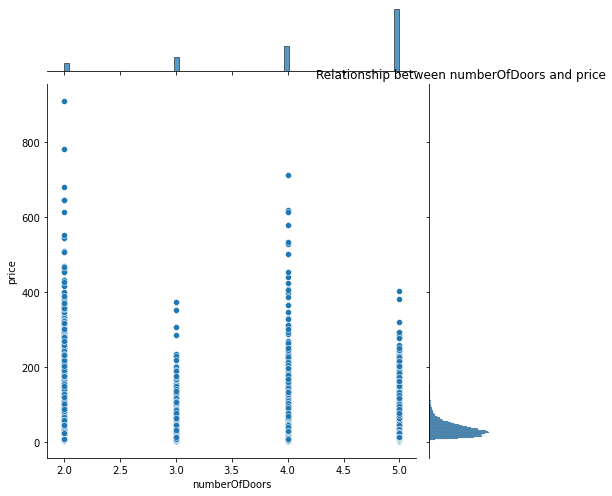

In [63]:
sns.jointplot(x="numberOfDoors", y="price", data=data1, size=7)
plt.title('Relationship between numberOfDoors and price')

## 19. numberOfForwardGears

In [64]:
data1['numberOfForwardGears'].value_counts(dropna=False)

5.0    30402
6.0    25729
4.0     7924
7.0     5242
8.0     3179
NaN     1969
9.0      842
3.0      703
0.0        5
Name: numberOfForwardGears, dtype: int64

Text(0.5, 0, 'Price Mean')

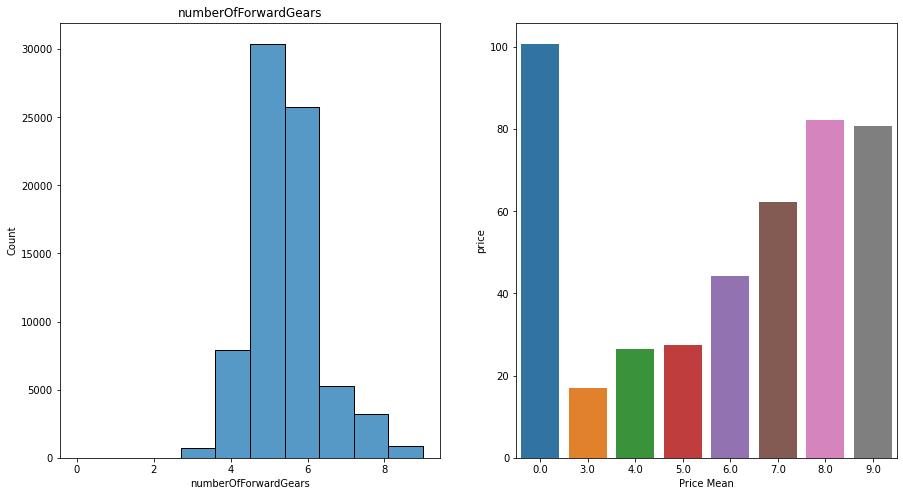

In [70]:
plt.figure(figsize=(15, 8))
plt.subplot(1,2,1)
sns.histplot(data1.numberOfForwardGears, bins=10)
plt.title('numberOfForwardGears')
fig = plt.subplot(1,2,2)
mean_price_by_numberOfForwardGears = data1.groupby('numberOfForwardGears', dropna=False).agg({'price': np.mean})
# edit the index to plot the null part
edited_index = list(mean_price_by_numberOfForwardGears.index)
# edited_index[6] = 'NaN'
mean_price_by_numberOfForwardGears.index = edited_index
# plot
sns.barplot(y=mean_price_by_numberOfForwardGears.price, x=mean_price_by_numberOfForwardGears.index)
plt.xlabel('Price Mean')

/home/genkibaskervillge/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Relationship between numberOfForwardGears and price')

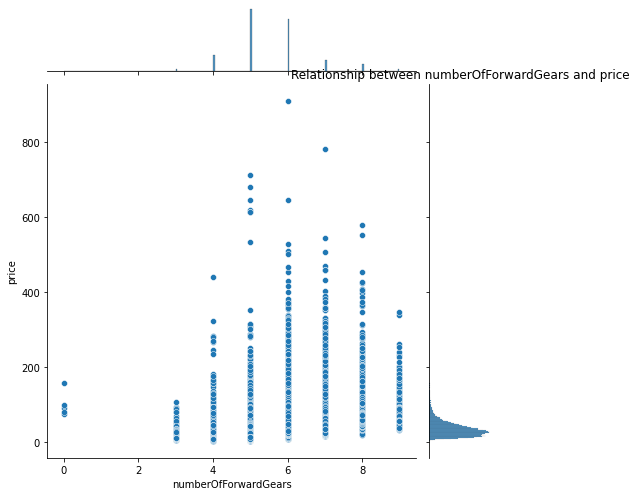

In [67]:
sns.jointplot(x="numberOfForwardGears", y="price", data=data1, size=7)
plt.title('Relationship between numberOfForwardGears and price')